In [1]:
import random
import numpy as np
import seaborn as sns
import math
import os
import time
import multiprocessing
from decimal import Decimal
import matplotlib.pyplot as plt
import traceback
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.stats import norm, entropy
#from select_sensor import SelectSensor
from sensor import Sensor
from joblib import Memory, Parallel, delayed, dump, load
%matplotlib inline

In [2]:
selectsensor = SelectSensor('config.json')

selectsensor.read_init_sensor('data/sensor.txt')
selectsensor.read_mean_std('data/mean_std.txt')
selectsensor.compute_multivariant_gaussian('data/artificial_samples.csv')

start = time.time()
selectsensor.select_offline_greedy_p(10, 4)
print('time elapsed:', time.time()-start)

Computed covariance!
[0] -14.2032423517
[1] -11.5213106168
[2] -6.6724615458
[3] -13.6821174371
[4] -20.5816916792
[5] -35.4891919175
[6] -21.9446023032
[7] -15.2654842091
[8] -13.1892678247
[9] -25.8192730129
[10] -19.533449786
[11] -24.9268760163
[12] -12.6913962135
[13] -10.5013991963
[14] -18.5031769155
[15] -24.2404420283
[16] -21.0787282228
[17] -22.4142194873
[18] -28.21042437
[19] -12.6367895029
[20] -12.6234541688
[21] -11.4290844874
[22] -22.3989552752
[23] -35.2956124381
[0, 2] -0.0827980640277
[1, 2] 0.174193188436
[2, 3] -0.00267052202267
[2, 4] -0.320017048905
[2, 5] -3.5299461897
[2, 6] -1.60521112754
[2, 7] -0.166800604652
[2, 8] -0.46939172652
[2, 9] -1.26633683764
[2, 10] -1.21846571406
[2, 11] -0.985800427099
[2, 12] -0.354501346054
[2, 13] -2.28980045928
[2, 14] -0.232845002992
[2, 15] -2.23036210145
[2, 16] -0.618276473527
[2, 17] -1.11488833727
[2, 18] -0.761529498081
[2, 19] -2.03961960396
[2, 20] -1.61484492609
[2, 21] -0.382559566714
[2, 22] -0.378791472224
[2,

In [4]:
selectsensor = SelectSensor('config.json')

selectsensor.read_init_sensor('data/sensor.txt')
selectsensor.read_mean_std('data/mean_std.txt')
selectsensor.compute_multivariant_gaussian('data/artificial_samples.csv')

start = time.time()
selectsensor.select_offline_greedy_p(10, 4)
print('time elapsed:', time.time()-start)

Computed covariance!
[0] -14.2032423517
[1] -11.5213106168
[2] -6.6724615458
[3] -13.6821174371
[4] -20.5816916792
[5] -35.4891919175
[6] -21.9446023032
[7] -15.2654842091
[8] -13.1892678247
[9] -25.8192730129
[10] -19.533449786
[11] -24.9268760163
[12] -12.6913962135
[13] -10.5013991963
[14] -18.5031769155
[15] -24.2404420283
[16] -21.0787282228
[17] -22.4142194873
[18] -28.21042437
[19] -12.6367895029
[20] -12.6234541688
[21] -11.4290844874
[22] -22.3989552752
[23] -35.2956124381
[0, 2] -0.0827980640277
[1, 2] 0.174193188436
[2, 3] -0.00267052202267
[2, 4] -0.320017048905
[2, 5] -3.5299461897
[2, 6] -1.60521112754
[2, 7] -0.166800604652
[2, 8] -0.46939172652
[2, 9] -1.26633683764
[2, 10] -1.21846571406
[2, 11] -0.985800427099
[2, 12] -0.354501346054
[2, 13] -2.28980045928
[2, 14] -0.232845002992
[2, 15] -2.23036210145
[2, 16] -0.618276473527
[2, 17] -1.11488833727
[2, 18] -0.761529498081
[2, 19] -2.03961960396
[2, 20] -1.61484492609
[2, 21] -0.382559566714
[2, 22] -0.378791472224
[2,

In [101]:
#visualize the sensors

sensors = {}
with open('data32/homogeneous/sensors', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y, std = int(line[0]), int(line[1]), float(line[2])
        sensors[(x, y)] = Sensor(x, y, std)
        
grid = np.zeros((32, 32))
for sensor in sensors:
    x, y = sensor[0], sensor[1]
    grid[x][y] = 1

#sensor_index = 1340
#sensor_index = 1526
sensor_index = 378
x = sensor_index//32
y = sensor_index%32
grid[x][y] = -1

#selected = [0, 1, 2, 3, 4, 6, 7, 15, 19, 23]
#sensor_list = list(selectsensor.sensors)
#for index in selected:
#    sensor = sensor_list[index]
#    grid[sensor[0]][sensor[1]] = -1

In [102]:
x,y

(11, 26)

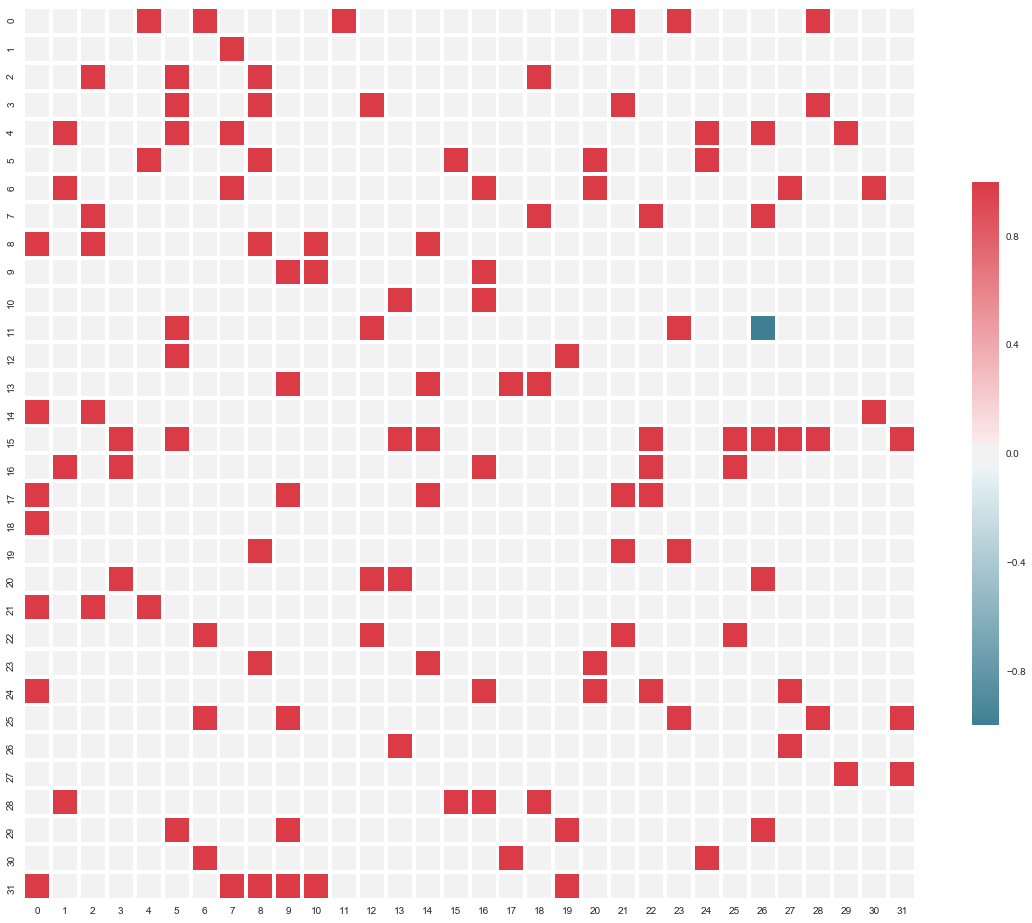

In [100]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=3, cbar_kws={"shrink": .5})

plt.show()

In [29]:
# visualize selected and not selected sensors

sensors = {}
with open('data/sensor.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y, std = int(line[0]), int(line[1]), float(line[2])
        sensors[(x, y)] = Sensor(x, y, std)
        
grid = np.zeros((15, 15))
selected = [0, 3, 6, 8, 9, 12, 15, 17, 18, 19]
i, j = 0, 0
for sensor in sensors:
    x, y = sensor[0], sensor[1]
    if i == selected[j]:
        grid[x][y] = 1
        j += 1
    else:
        grid[x][y] = -1
    i += 1

In [221]:
myconfig = {
    256: 0.388882393442197,
    512: 0.38711563194200865,
    1024: 0.3982618184652559,
    2048: 0.4226197435597646,
    4096: 0.4608519427881055,
    8192: 0.5318082024500825,
    16384: 0.6709536614833002
}

In [ ]:
homo = pd.read_csv('data2/homogeneous/hypothesis', header=None, delimiter=' ')
homo[5] = homo[5].astype(float)
homo

In [267]:
size = len(homo)
homo[5]
for i in range(size):
    config = homo.iloc[i, 5]
    homo.set_value(i, 5, myconfig.get(config))

In [268]:
homo.to_csv('data2/homogeneous/hypothesis', header=False, index=False)

In [ ]:
homo

In [203]:
myconfig.get(256)

0.38887482106213006

In [ ]:
hetero = pd.read_csv('data2/heterogeneous/hypothesis', header=None, delimiter=' ')
hetero[5] = hetero[5].astype(float)
hetero

In [273]:
size = len(hetero)
hetero[5]
for i in range(size):
    config = hetero.iloc[i, 5]
    hetero.set_value(i, 5, myconfig.get(config))

In [274]:
hetero.to_csv('data2/heterogeneous/hypothesis', header=False, index=False)

In [ ]:
subset_to_compute = []
ot_approx = []
with open('plot_data3/ot_approx', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace('[', '')
        line = line.replace(']', ',')
        line = line.replace('\n', '')
        line = line.replace(' ', '')
        line = line.split(',')
        size = len(line)
        subset = []
        for i in range(size-1):
            index = int(line[i])
            subset.append(index)
        ot_approx.append(line[size-1])
        subset_to_compute.append(subset)
print(subset_to_compute)
print(ot_approx)

In [263]:
num = [i for i in range(1, len(ot_approx)+1)]
ot_a = pd.DataFrame(np.array([num, ot_approx]).T)

In [265]:
ot_a.to_csv('plot_data3/ot_approx.csv', index=False, header=False)

In [3]:
hypothesis = pd.read_csv('data2/heterogeneous/hypothesis', delimiter=' ', header=None)

In [5]:
dist = hypothesis[4]
dist.count()

4096000

In [6]:
dist[dist<0.0001].count()

2589497

In [12]:
hypothesis

,0,1,2,3,4,5
0,0,0,26,16,2.018247,0.977272
1,0,0,19,57,0.000000,3.174743
2,0,0,18,25,0.000000,0.493154
3,0,0,54,48,0.000000,1.721276
4,0,0,18,45,0.000000,1.244544
5,0,0,33,57,0.000000,1.575726
6,0,0,29,56,0.000000,1.194140
7,0,0,35,28,0.000000,1.575726
8,0,0,36,1,0.000000,2.357461
9,0,0,9,47,0.000000,1.215456


In [11]:
summation = 0
for i in range(1000, 960, -1):
    summation += math.ceil(i/4)
summation

9820

In [7]:
np.random.randn(100).reshape(10, 10)

array([[-0.75097259,  1.06178328,  0.69879581,  1.02510598,  0.66588382,
         0.74305754, -1.05109543, -1.54722358, -0.23815156,  0.74990223],
       [ 0.91436508,  1.1896718 , -0.05209154,  0.99500269,  1.19750661,
         0.06659942, -1.10198553, -0.06601054,  0.36947556,  1.77674548],
       [ 1.03032526,  2.21562251,  0.95840857, -0.47484947, -0.6144497 ,
         0.37397402,  1.51929743, -1.08914025,  1.46281065, -1.33320279],
       [-0.03714762,  0.0750532 , -0.62637999, -0.05816952, -1.01999602,
         0.10186646,  1.22489704, -1.04139381, -0.13005311, -0.11756708],
       [ 1.48621488, -2.4886965 , -0.62508688, -0.20916544,  0.6770299 ,
        -1.39176768, -0.1106538 ,  0.28859379,  0.32112089,  0.48062669],
       [-0.01672552, -0.65560422, -0.98315156, -0.32687988,  0.33004741,
         1.02427564, -0.46790267, -1.49730365,  0.95375838, -1.07260189],
       [ 0.1567999 , -0.48821728,  1.10953997, -1.99187542,  0.38282079,
        -0.81791249, -0.20649651,  0.96839613

In [9]:
np.zeros(100).reshape(10, 10)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [11]:
def index_to_location(index, grid_len):
    return (index//grid_len, index%grid_len)

In [16]:
index_to_location(250, 16)

(15, 10)

In [2]:
pk = [0.5, 0.5]
entropy(pk, base=2)

1.0

In [3]:
a = np.zeros((50, 1024, 100))

In [8]:
a[1, 2, 1] = 1

In [9]:
a[1, 2]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [42]:
X = np.linspace(-5, 7, 101)
X

array([-5.  , -4.88, -4.76, -4.64, -4.52, -4.4 , -4.28, -4.16, -4.04,
       -3.92, -3.8 , -3.68, -3.56, -3.44, -3.32, -3.2 , -3.08, -2.96,
       -2.84, -2.72, -2.6 , -2.48, -2.36, -2.24, -2.12, -2.  , -1.88,
       -1.76, -1.64, -1.52, -1.4 , -1.28, -1.16, -1.04, -0.92, -0.8 ,
       -0.68, -0.56, -0.44, -0.32, -0.2 , -0.08,  0.04,  0.16,  0.28,
        0.4 ,  0.52,  0.64,  0.76,  0.88,  1.  ,  1.12,  1.24,  1.36,
        1.48,  1.6 ,  1.72,  1.84,  1.96,  2.08,  2.2 ,  2.32,  2.44,
        2.56,  2.68,  2.8 ,  2.92,  3.04,  3.16,  3.28,  3.4 ,  3.52,
        3.64,  3.76,  3.88,  4.  ,  4.12,  4.24,  4.36,  4.48,  4.6 ,
        4.72,  4.84,  4.96,  5.08,  5.2 ,  5.32,  5.44,  5.56,  5.68,
        5.8 ,  5.92,  6.04,  6.16,  6.28,  6.4 ,  6.52,  6.64,  6.76,
        6.88,  7.  ])

In [47]:
norm.cdf(X, 1, 2)

array([ 0.0013499 ,  0.00164106,  0.00198838,  0.00240118,  0.00289007,
        0.00346697,  0.0041453 ,  0.00494002,  0.00586774,  0.00694685,
        0.00819754,  0.00964187,  0.01130384,  0.01320938,  0.01538633,
        0.01786442,  0.02067516,  0.02385176,  0.02742895,  0.03144276,
        0.03593032,  0.04092951,  0.04647866,  0.05261614,  0.05937994,
        0.0668072 ,  0.0749337 ,  0.08379332,  0.09341751,  0.10383468,
        0.11506967,  0.12714315,  0.14007109,  0.15386423,  0.16852761,
        0.18406013,  0.20045419,  0.21769544,  0.2357625 ,  0.25462691,
        0.27425312,  0.29459852,  0.3156137 ,  0.33724273,  0.35942357,
        0.38208858,  0.40516513,  0.42857628,  0.45224157,  0.47607782,
        0.5       ,  0.52392218,  0.54775843,  0.57142372,  0.59483487,
        0.61791142,  0.64057643,  0.66275727,  0.6843863 ,  0.70540148,
        0.72574688,  0.74537309,  0.7642375 ,  0.78230456,  0.79954581,
        0.81593987,  0.83147239,  0.84613577,  0.85992891,  0.87

In [44]:
norm.pdf(X, 1, 2)

array([ 0.00221592,  0.00264817,  0.00315336,  0.00374144,  0.00442323,
        0.00521047,  0.00611576,  0.00715255,  0.00833505,  0.00967814,
        0.01119727,  0.01290829,  0.01482729,  0.01697038,  0.01935343,
        0.0219918 ,  0.02490004,  0.02809157,  0.03157828,  0.0353702 ,
        0.03947508,  0.04389804,  0.04864113,  0.05370304,  0.05907865,
        0.0647588 ,  0.07072998,  0.07697414,  0.08346852,  0.09018558,
        0.09709303,  0.1041539 ,  0.11132675,  0.11856598,  0.12582217,
        0.13304262,  0.14017191,  0.14715251,  0.15392563,  0.1604319 ,
        0.1666123 ,  0.172409  ,  0.17776626,  0.18263134,  0.1869553 ,
        0.19069391,  0.19380831,  0.19626574,  0.19804011,  0.19911242,
        0.19947114,  0.19911242,  0.19804011,  0.19626574,  0.19380831,
        0.19069391,  0.1869553 ,  0.18263134,  0.17776626,  0.172409  ,
        0.1666123 ,  0.1604319 ,  0.15392563,  0.14715251,  0.14017191,
        0.13304262,  0.12582217,  0.11856598,  0.11132675,  0.10

In [38]:
multivariate_normal(mean=1, cov=4).pdf(X)

array([ 0.02699548,  0.028669  ,  0.03041832,  0.03224476,  0.03414949,
        0.03613354,  0.03819776,  0.04034285,  0.0425693 ,  0.04487739,
        0.04726719,  0.04973857,  0.05229112,  0.05492421,  0.05763694,
        0.06042813,  0.06329634,  0.06623984,  0.06925659,  0.07234428,
        0.07550026,  0.07872159,  0.08200504,  0.08534702,  0.08874368,
        0.09219082,  0.09568396,  0.0992183 ,  0.10278876,  0.10638996,
        0.11001627,  0.11366175,  0.11732025,  0.12098536,  0.12465045,
        0.1283087 ,  0.13195308,  0.13557642,  0.1391714 ,  0.14273058,
        0.14624643,  0.14971134,  0.15311768,  0.15645778,  0.159724  ,
        0.16290875,  0.16600449,  0.1690038 ,  0.17189937,  0.17468407,
        0.17735095,  0.17989328,  0.18230457,  0.18457861,  0.18670949,
        0.18869161,  0.19051975,  0.19218904,  0.19369501,  0.1950336 ,
        0.1962012 ,  0.19719462,  0.19801116,  0.19864858,  0.19910514,
        0.19937958,  0.19947114,  0.19937958,  0.19910514,  0.19

# test dump, load, and access time

In [5]:
data = np.random.random(int(1e7))

In [8]:
%timeit data[0]

86.4 ns ± 3.78 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [9]:
data_filename_memmap = 'joblib_memmap/test'
dump(data, data_filename_memmap)

['joblib_memmap/test']

In [10]:
data2 = load(data_filename_memmap, mmap_mode='r')

In [18]:
type(data2)

numpy.core.memmap.memmap

In [12]:
%timeit data2[0]

562 ns ± 2.21 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
data3 = np.array(data2)

In [16]:
%timeit data3[0]

81.3 ns ± 0.555 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [24]:
output = load('joblib_memmap/discretize_x', mmap_mode='r')

In [31]:
output.shape

(128, 1024, 100)

In [33]:
%timeit output[0, 0, 0]

599 ns ± 5.69 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [28]:
output2 = np.array(output)

In [32]:
%timeit output2[0, 0, 0]

109 ns ± 0.372 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Q_function --> lookup table

In [91]:
%timeit lookup_table = np.array([1. - 0.5*(1. + math.erf(i/1.4142135623730951)) for i in np.arange(0, 8.3, 0.0001)])

80.4 ms ± 685 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
lookup_table = np.array([1. - 0.5*(1. + math.erf(i/1.4142135623730951)) for i in np.arange(0, 8.3, 0.0001)])

def lookup(q_param, lookup_table):
    if q_param > 8.3:
        return 0.
    index = int(q_param*10000)
    return lookup_table[index]

In [95]:
test = [0.001, 0.0001, 4.5, 4.6, 0.1, 0.2]
for t in test:
    print('lookup table', t, lookup(t, lookup_table))
    print('norm.sf     ', t, norm.sf(t))
    print()

lookup table 0.001 0.499601057786089
norm.sf      0.001 0.49960105778608893

lookup table 0.0001 0.4999601057720263
norm.sf      0.0001 0.4999601057720263

lookup table 4.5 3.3976731247387093e-06
norm.sf      4.5 3.3976731247300535e-06

lookup table 4.6 2.1124547024964357e-06
norm.sf      4.6 2.1124547025028537e-06

lookup table 0.1 0.460172162722971
norm.sf      0.1 0.460172162722971

lookup table 0.2 0.420740290560897
norm.sf      0.2 0.42074029056089696



In [90]:
test = [0.001, 0.0001, 4.5, 4.6, 0.1, 0.2]
for t in test:
    print('lookup table', t, lookup(t, lookup_table))
    print('norm.sf     ', t, norm.sf(t))
    print()

lookup table 0.001 0.499601057786089
norm.sf      0.001 0.49960105778608893

lookup table 0.0001 0.5
norm.sf      0.0001 0.4999601057720263

lookup table 4.5 3.3976731247387093e-06
norm.sf      4.5 3.3976731247300535e-06

lookup table 4.6 2.1124547024964357e-06
norm.sf      4.6 2.1124547025028537e-06

lookup table 0.1 0.460172162722971
norm.sf      0.1 0.460172162722971

lookup table 0.2 0.420740290560897
norm.sf      0.2 0.42074029056089696



In [63]:
%timeit lookup_table = np.array([1. - 0.5*(1. + math.erf(i/math.sqrt(2.))) for i in np.arange(0, 10, 0.001)])

11 ms ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%timeit lookup_table = np.array([norm.sf(i) for i in np.arange(0, 10, 0.001)])

1.25 s ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
np.array([1. - 0.5*(1. + math.erf(i/math.sqrt(2.))) for i in np.arange(0, 10, 0.001)])

array([0.5       , 0.49960106, 0.49920212, ..., 0.        , 0.        ,
       0.        ])

In [65]:
np.array([norm.sf(i) for i in np.arange(0, 10, 0.001)])

array([5.00000000e-01, 4.99601058e-01, 4.99202116e-01, ...,
       7.85418809e-24, 7.77529412e-24, 7.69718501e-24])

In [75]:
1. - 0.5*(1. + math.erf(8.3/math.sqrt(2.)))

0.0

In [58]:
np.arange(0, 10, 0.0001)

array([0.0000e+00, 1.0000e-04, 2.0000e-04, ..., 9.9997e+00, 9.9998e+00,
       9.9999e+00])

In [57]:
for i in range(0, 20):
    print(i, norm.sf(i), 1. - 0.5*(1. + math.erf(i/math.sqrt(2.))))

0 0.5 0.5
1 0.15865525393145707 0.15865525393145696
2 0.022750131948179195 0.02275013194817932
3 0.0013498980316300933 0.0013498980316301035
4 3.167124183311986e-05 3.167124183311998e-05
5 2.866515718791933e-07 2.866515718125129e-07
6 9.865876450376946e-10 9.865877004244794e-10
7 1.279812543885835e-12 1.2798651027878805e-12
8 6.22096057427174e-16 6.661338147750939e-16
9 1.1285884059538324e-19 0.0
10 7.61985302416047e-24 0.0
11 1.910659574498663e-28 0.0
12 1.776482112077653e-33 0.0
13 6.117164399549704e-39 0.0
14 7.7935368191928e-45 0.0
15 3.6709661993126986e-51 0.0
16 6.388754400537906e-58 0.0
17 4.105996202098791e-65 0.0
18 9.740948918936876e-73 0.0
19 8.527223952630975e-81 0.0


In [8]:
lookup = np.zeros(10000)

In [9]:
%timeit lookup[0]

121 ns ± 0.919 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [34]:
%timeit norm.sf(1)

122 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [111]:
np.random.seed(0)
sensor_output = np.random.rand(17)*100
np.array(sensor_output * 10000, np.int)

array([548813, 715189, 602763, 544883, 423654, 645894, 437587, 891773,
       963662, 383441, 791725, 528894, 568044, 925596,  71036,  87129,
        20218])

In [119]:
np.random.seed(0)
sensor_output = np.random.rand(17)*50
index = np.array(sensor_output * 10000, np.int)
print(index)
[i if i<390000 else 389999 for i in index]

[274406 357594 301381 272441 211827 322947 218793 445886 481831 191720
 395862 264447 284022 462798  35518  43564  10109]


[274406,
 357594,
 301381,
 272441,
 211827,
 322947,
 218793,
 389999,
 389999,
 191720,
 389999,
 264447,
 284022,
 389999,
 35518,
 43564,
 10109]

In [120]:
norm(0, 1).pdf(39)

0.0

In [102]:
truncate = lambda x: x if x<38999 else 38999

In [136]:
alist = [(1, 1), (2, 3)]
blist = [(1, 1), (3, 10)]
list(set(alist).union(set(blist)))

[(3, 10), (2, 3), (1, 1)]

In [131]:
alist.remove(blist)

ValueError: list.remove(x): x not in list

In [81]:
lookup_table_norm = norm(0, 1).pdf(np.arange(0, 39, 0.0001))

In [126]:
mean_vec = np.zeros(17)
std = np.ones(17)*1
sensor_output = np.random.rand(17)*50
sensor_output

array([ 0.93949002, 30.88177485, 30.60478614, 30.84669984, 47.18740393,
       34.09101496, 17.97539503, 21.85159769, 34.8815598 ,  3.01127358,
       33.33833577, 33.53189348, 10.51912805,  6.44631488, 15.77141755,
       18.18553855, 28.50983852])

In [127]:
def get_pdfs(mean_vec, stds, sensor_outputs):
    ''' Replace norm(mean_vec, stds).pdf(sensor_outputs[sensor_subset])
    '''
    sensor_outputs = np.abs((sensor_outputs - mean_vec) / stds)
    index = [i if i<390000 else 389999 for i in np.array(sensor_outputs * 10000, np.int)]
    #index = [i if i<390000 else 389999 for i in index]
    return lookup_table_norm[index]

In [128]:
%timeit get_pdfs(mean_vec, std, sensor_output)
get_pdfs(mean_vec, std, sensor_output)

12.2 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


array([2.56615939e-001, 3.25132747e-208, 1.62350825e-204, 9.60606846e-208,
       0.00000000e+000, 1.71078015e-253, 2.74257710e-071, 8.23563200e-105,
       2.47586538e-265, 4.28514344e-003, 1.79594353e-242, 2.78320636e-245,
       3.74325812e-025, 3.77923101e-010, 3.87564694e-055, 6.13228925e-073,
       1.26399192e-177])

In [93]:
%timeit get_pdfs(mean_vec, std, sensor_output)
get_pdfs(mean_vec, std, sensor_output)

3.64 µs ± 26.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


array([2.05543048e-09, 2.93086768e-01, 8.79172993e-09, 1.95379265e-02,
       2.75231002e-08, 4.92152714e-10, 4.83037762e-02, 1.18560595e-07,
       6.86241536e-07, 4.00885958e-02, 6.63404745e-22, 1.77950314e-10,
       2.16977276e-11, 3.69046518e-01, 1.07228885e-02, 9.58868547e-05,
       5.29084045e-19])

In [94]:
sensor_output

array([6.17809769, 0.78530113, 5.93818926, 2.45627914, 5.74277269,
       6.40524561, 2.05499306, 5.48252338, 5.15231737, 2.14374238,
       9.78226303, 6.56215554, 6.87539867, 0.39478233, 2.68942783,
       4.08250593, 9.07350258])

In [78]:
%timeit np.array([norm(0, 1).pdf(i) for i in np.arange(0, 39, 0.01)])

2.54 s ± 29.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
mynorm = norm(0, 1)

In [76]:
%timeit np.array([mynorm.pdf(i) for i in np.arange(0, 39, 0.01)])

318 ms ± 26.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
%timeit norm(0, 1).pdf(np.arange(0, 39, 0.1))

665 µs ± 4.62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%timeit norm(0, 1).pdf(np.ones(20))

644 µs ± 3.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
norm(0, 1).pdf(np.ones(17))

array([0.24197072, 0.24197072, 0.24197072, 0.24197072, 0.24197072,
       0.24197072, 0.24197072, 0.24197072, 0.24197072, 0.24197072,
       0.24197072, 0.24197072, 0.24197072, 0.24197072, 0.24197072,
       0.24197072, 0.24197072])

In [59]:
for i in range(50):
    print(i, norm(0, 1).pdf(i))

0 0.3989422804014327
1 0.24197072451914337
2 0.05399096651318806
3 0.0044318484119380075
4 0.00013383022576488537
5 1.4867195147342979e-06
6 6.075882849823286e-09
7 9.134720408364595e-12
8 5.052271083536893e-15
9 1.0279773571668917e-18
10 7.69459862670642e-23
11 2.1188192535093538e-27
12 2.1463837356630605e-32
13 7.998827757006813e-38
14 1.0966065593889713e-43
15 5.530709549844416e-50
16 1.0261630727919036e-56
17 7.004182134318583e-64
18 1.758749542595104e-71
19 1.624636036773608e-79
20 5.520948362159764e-88
21 6.902029420127222e-97
22 3.1742815528252627e-106
23 5.370560365020593e-116
24 3.342714441794458e-126
25 7.653929736419393e-137
26 6.447259971397853e-148
27 1.9978892591682797e-159
28 2.277577478736661e-171
29 9.551694541948838e-184
30 1.4736461348785476e-196
31 8.363951605856463e-210
32 1.746366256758777e-223
33 1.3414196673494362e-237
34 3.790526400092868e-252
35 3.940396277136024e-267
36 1.5069047176203946e-282
37 2.120006551524606e-298
38 1.097221052e-314
39 0.0
40 0.0
41 0.0

In [45]:
%timeit 1. - 0.5*(1. + math.erf(1/math.sqrt(2.)))

903 ns ± 0.481 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [50]:
%timeit 1. - 0.5*(1. + math.erf(1/1.4142135623730951))

682 ns ± 0.471 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [49]:
math.sqrt(2.)

1.4142135623730951

In [41]:
%timeit lookup[0]

166 ns ± 0.358 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [51]:
lookup[1]=1

In [52]:
%timeit (lookup[1] - lookup[1])**2 / lookup[1] + lookup[1]

1.41 µs ± 3.58 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [96]:
%timeit math.sqrt(2)

176 ns ± 0.114 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [97]:
%timeit math.sqrt(2.123)

153 ns ± 0.04 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [98]:
%timeit 2.2 ** 2

19.5 ns ± 0.00416 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [99]:
%timeit 2.2*2.2

19.5 ns ± 0.00139 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


# Latitude (y), Longitude (x)

In [102]:
a = (-73.081539 + 73.129160)/2

In [108]:
a

0.023810499999996182

In [109]:
a - 73.129160 

-73.1053495

In [110]:
b = (40.885853-40.849868)/2

In [113]:
b + 40.849868

40.8678605

In [1]:
left_up    = (-73.143383, 40.896615)
right_up   = (-73.067228, 40.896615)
left_down  = (-73.143383, 40.839021)  # here is (0, 0)
right_down = (-73.067228, 40.839021)
grid_len   = 64
long_step  = (right_up[0] - left_up[0])/grid_len
lat_step   = (right_up[1] - right_down[1])/grid_len

In [2]:
long_step, lat_step

(0.0011899218749999996, 0.0008999062499999155)

In [3]:
trans_long_lat = []  # in the end, print in (lat, long)
for i in range(grid_len):
    for j in range(grid_len):
        x = left_down[0] + i*long_step
        y = left_down[1] + j*lat_step
        trans_long_lat.append((x, y))

In [4]:
trans_long_lat

[(-73.143383, 40.839021),
 (-73.143383, 40.83992090625),
 (-73.143383, 40.8408208125),
 (-73.143383, 40.841720718750004),
 (-73.143383, 40.842620625),
 (-73.143383, 40.84352053125),
 (-73.143383, 40.844420437500006),
 (-73.143383, 40.845320343750004),
 (-73.143383, 40.84622025),
 (-73.143383, 40.84712015625),
 (-73.143383, 40.8480200625),
 (-73.143383, 40.84891996875),
 (-73.143383, 40.849819875),
 (-73.143383, 40.85071978125),
 (-73.143383, 40.851619687500005),
 (-73.143383, 40.85251959375),
 (-73.143383, 40.8534195),
 (-73.143383, 40.85431940625),
 (-73.143383, 40.8552193125),
 (-73.143383, 40.85611921875),
 (-73.143383, 40.857019125),
 (-73.143383, 40.85791903125),
 (-73.143383, 40.858818937500004),
 (-73.143383, 40.85971884375),
 (-73.143383, 40.86061875),
 (-73.143383, 40.86151865625),
 (-73.143383, 40.8624185625),
 (-73.143383, 40.86331846875),
 (-73.143383, 40.864218375),
 (-73.143383, 40.86511828125),
 (-73.143383, 40.8660181875),
 (-73.143383, 40.86691809375),
 (-73.143383, 40

In [5]:
with open('dataSplat/lat_long', 'w') as f:
    for tran in trans_long_lat:
        f.write('{}, {}, {}\n'.format(tran[1], tran[0], 30.0))

# Visualize

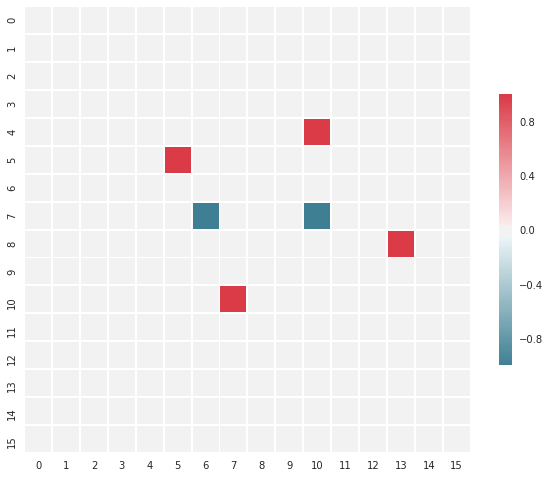

In [17]:
grid_len=16
grid = np.zeros((grid_len, grid_len))

Tx = [118, 122]
Sensors = [(4, 10), (5, 5), (8, 13), (10, 7)]

for tx in Tx:
    x = tx//grid_len
    y = tx%grid_len
    grid[x, y] = -1

for s in Sensors:
    grid[s[0], s[1]] = 1


sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap=cmap, vmax=1, center=0,
            square=True, linewidth=1, cbar_kws={"shrink": .5})

plt.show()

In [25]:
def combine(s, b):
    prod = 1
    for i in range(s, s-b, -1):
        prod *= i
    for i in range(1, b+1):
        prod /= i
    return int(prod)

In [33]:
combine(40, 6) / 16

239898.75

In [7]:
array = np.ix_(range(0, 40*40, 40), range(0, 40*40, 40))

In [14]:
array = np.arange(36).reshape(6, 6)

In [15]:
array

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [16]:
np.ix_([1,3],[2,5])

(array([[1],
        [3]]), array([[2, 5]]))

In [17]:
array[np.ix_([1,3],[2,5])]

array([[ 8, 11],
       [20, 23]])